# Flight Delay Project 
## Description
This project is made to analyse, understand and make model of Flight Delays Data from 2015. This data set is part of kaggle datasets: https://www.kaggle.com/usdot/flight-delays

### Steps
- Improting data ✅
- Understanding data ✅
- Analysing data ✅
-  Plotting data in depend of:
    - airport
    - airline
    - plane type
- Feature engineering
- Modeling data
- Finding best algorithm

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Data import

In [2]:
data = pd.read_csv('DATA/flights.csv')

C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1) Warning informs that columns 7 and 8 have data types mixed. This is a very important point for the future.

In [3]:
print(data.shape)

(5819079, 31)


In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## Looking for _na_

In [6]:
data.isna().sum()*100/data.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [7]:
data[data['CANCELLED']>0]['ARRIVAL_DELAY'].dropna()

Series([], Name: ARRIVAL_DELAY, dtype: float64)

From the above result, I conclude that there are no delays in the data when the flight is canceled. For this reason, I remove the **CANCLLED** and **CANCELLATION_REASON** columns from the data because in this example I am dealing with delays.

In [8]:
data = data.drop(['CANCELLED','CANCELLATION_REASON'], axis=1)

In [9]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,4.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,4.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,11.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,8.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,5.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
data_without_nulls.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

Reason of delay would be obvious for algorithm to define it with occurrence of a delay. Thats why I drop those columns.

In [13]:
Flights_Delays_Combined =  data_without_nulls.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [14]:
Flights_Delays_Combined.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0


In refrence to point **1)** I am handling mixed data types by making writing function that changes numer airport code to unknown ('unk')

In [15]:
Flights_Delays_Combined['ORIGIN_AIRPORT'].value_counts()

ATL      343506
ORD      276554
DFW      232647
DEN      193402
LAX      192003
          ...  
12265         1
13502         1
13459         1
11905         1
11503         1
Name: ORIGIN_AIRPORT, Length: 929, dtype: int64

In [16]:
Flights_Delays_Combined['DESTINATION_AIRPORT'].value_counts()

ATL      343076
ORD      275864
DFW      231764
DEN      193033
LAX      192136
          ...  
14025         1
14222         1
12265         1
13459         1
15497         1
Name: DESTINATION_AIRPORT, Length: 929, dtype: int64

In [17]:
def airport_trainsformation(value):
    '''
    >>> airport_trainsformation('ATL')
    'ATL'
    >>> airport_trainsformation(11097)
    'unk'
    >>> airport_trainsformation(15497)
    'unk'
    '''
    if type(value) is not str:
        return 'unk'
    else:
        return value

import doctest
doctest.testmod()

TestResults(failed=0, attempted=3)

In [18]:
Flights_Delays_Combined['ORIGIN_AIRPORT_transformed'] = Flights_Delays_Combined['ORIGIN_AIRPORT'].apply(airport_trainsformation)
Flights_Delays_Combined['DESTINATION_AIRPORT_transformed'] = Flights_Delays_Combined['DESTINATION_AIRPORT'].apply(airport_trainsformation)

In [19]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'], axis=1)

In [20]:
Flights_Delays_Combined['AIRLINE'].value_counts()

WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: AIRLINE, dtype: int64

In [21]:
Flights_Delays_Combined.isnull().sum()

YEAR                               0
MONTH                              0
DAY                                0
DAY_OF_WEEK                        0
AIRLINE                            0
FLIGHT_NUMBER                      0
TAIL_NUMBER                        0
SCHEDULED_DEPARTURE                0
DEPARTURE_TIME                     0
DEPARTURE_DELAY                    0
TAXI_OUT                           0
WHEELS_OFF                         0
SCHEDULED_TIME                     0
ELAPSED_TIME                       0
AIR_TIME                           0
DISTANCE                           0
WHEELS_ON                          0
TAXI_IN                            0
SCHEDULED_ARRIVAL                  0
ARRIVAL_TIME                       0
ARRIVAL_DELAY                      0
DIVERTED                           0
ORIGIN_AIRPORT_transformed         0
DESTINATION_AIRPORT_transformed    0
dtype: int64

There are no missing data left in dataset.

### Not understable data format in time columns
In data dates are in float format. Those should be changed for datetime format. I defined *time_transformation* with doctesting function for that.

In [22]:
Flights_Delays_Combined['DEPARTURE_TIME']

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64

In [23]:
max(Flights_Delays_Combined['DEPARTURE_TIME'])

2400.0

Hours are in numerical format. I convert them to datetime

In [24]:
def time_transformation(time):
  """
  >>> time_transformation(0)
  datetime.time(0, 0)
  >>> time_transformation(2400)
  datetime.time(0, 0)
  >>> time_transformation(2359)
  datetime.time(23, 59)
  >>> time_transformation(1200)
  datetime.time(12, 0)
  >>> time_transformation(0734.00)
  datetime.time(7, 34)
  >>> time_transformation(734.00)
  datetime.time(7, 34)
  >>> time_transformation(34.00)
  datetime.time(0, 34)
  >>> time_transformation(4.00)
  datetime.time(0, 4)
  """
  time_string = str(int(time))
  time_string = time_string.split('.')[0]
  time_string = time_string.zfill(4)
  hours = int(time_string[0:2])
  minutes = int(time_string[2:4])
  if hours == 24:
    hours = 0
  hours_minutes = datetime.time(hours,minutes)
  return hours_minutes
  
import doctest
doctest.testmod()

TestResults(failed=0, attempted=11)

In [25]:
Flights_Delays_Combined['DEP_TIME'] = Flights_Delays_Combined['DEPARTURE_TIME'].apply(time_transformation)
Flights_Delays_Combined['DEP_TIME']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: DEP_TIME, Length: 5714008, dtype: object

In [26]:
Flights_Delays_Combined['SCH_ARR_TIME'] =Flights_Delays_Combined['SCHEDULED_ARRIVAL'].apply(time_transformation)
Flights_Delays_Combined['SCH_DEP_TIME'] =Flights_Delays_Combined['SCHEDULED_DEPARTURE'].apply(time_transformation)
Flights_Delays_Combined['ARR_TIME'] =Flights_Delays_Combined['ARRIVAL_TIME'].apply(time_transformation)

Combining columns with dates into a single Datetime column

In [27]:
Flights_Delays_Combined['DATE'] = pd.to_datetime(Flights_Delays_Combined[['YEAR','MONTH','DAY']])
Flights_Delays_Combined['DATE']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, Length: 5714008, dtype: datetime64[ns]

In [28]:
Flights_Delays_Combined

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE
0,2015,1,1,4,AS,98,N407AS,5,2354.0,-11.0,...,408.0,-22.0,0,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,10,2.0,-8.0,...,741.0,-9.0,0,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01
2,2015,1,1,4,US,840,N171US,20,18.0,-2.0,...,811.0,5.0,0,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,20,15.0,-5.0,...,756.0,-9.0,0,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01
4,2015,1,1,4,AS,135,N527AS,25,24.0,-1.0,...,259.0,-21.0,0,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,2359,2355.0,-4.0,...,753.0,-26.0,0,LAX,BOS,23:55:00,08:19:00,23:59:00,07:53:00,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,2359,2355.0,-4.0,...,430.0,-16.0,0,JFK,PSE,23:55:00,04:46:00,23:59:00,04:30:00,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,2359,2350.0,-9.0,...,432.0,-8.0,0,JFK,SJU,23:50:00,04:40:00,23:59:00,04:32:00,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,2359,2353.0,-6.0,...,330.0,-10.0,0,MCO,SJU,23:53:00,03:40:00,23:59:00,03:30:00,2015-12-31


In [29]:
Flights_Delays_Combined['DayOfWeek'] = Flights_Delays_Combined['DATE'].apply(date.weekday)
Flights_Delays_Combined = Flights_Delays_Combined.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK'], axis=1)

 Categorical variables such as AIRLINE, PLANE, DEP_ARP, ARR_ARP should also take into account

In [30]:
DELAY_TRESHOLD = 15

I convert delay values to a binary value. The threshold I choose for the delay, according to FAA regulations, is 15 minutes

In [31]:
Flights_Delays_Combined = Flights_Delays_Combined.drop(['DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'ARRIVAL_TIME'], axis=1)

In [32]:
Flights_Delays_Combined.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,ARRIVAL_DELAY,DIVERTED,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek
0,AS,98,N407AS,-11.0,21.0,15.0,205.0,194.0,169.0,1448,...,-22.0,0,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3
1,AA,2336,N3KUAA,-8.0,12.0,14.0,280.0,279.0,263.0,2330,...,-9.0,0,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3
2,US,840,N171US,-2.0,16.0,34.0,286.0,293.0,266.0,2296,...,5.0,0,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3
3,AA,258,N3HYAA,-5.0,15.0,30.0,285.0,281.0,258.0,2342,...,-9.0,0,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3
4,AS,135,N527AS,-1.0,11.0,35.0,235.0,215.0,199.0,1448,...,-21.0,0,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3


In [33]:
def delation_transformation(delay):
    return 1 if delay >= DELAY_TRESHOLD else 0

In [34]:
Flights_Delays_Combined['Delayed'] = Flights_Delays_Combined['ARRIVAL_DELAY'].apply(delation_transformation)

In [35]:
Flights_Delays_Binary = Flights_Delays_Combined.drop(['ARRIVAL_DELAY'], axis=1)
Flights_Delays_Binary = Flights_Delays_Binary.drop(['DEPARTURE_DELAY'], axis=1)

In [36]:
Flights_Delays_Binary

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,...,DIVERTED,ORIGIN_AIRPORT_transformed,DESTINATION_AIRPORT_transformed,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Delayed
0,AS,98,N407AS,21.0,15.0,205.0,194.0,169.0,1448,404.0,...,0,ANC,SEA,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0
1,AA,2336,N3KUAA,12.0,14.0,280.0,279.0,263.0,2330,737.0,...,0,LAX,PBI,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0
2,US,840,N171US,16.0,34.0,286.0,293.0,266.0,2296,800.0,...,0,SFO,CLT,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0
3,AA,258,N3HYAA,15.0,30.0,285.0,281.0,258.0,2342,748.0,...,0,LAX,MIA,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0
4,AS,135,N527AS,11.0,35.0,235.0,215.0,199.0,1448,254.0,...,0,SEA,ANC,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,N657JB,22.0,17.0,320.0,298.0,272.0,2611,749.0,...,0,LAX,BOS,23:55:00,08:19:00,23:59:00,07:53:00,2015-12-31,3,0
5819075,B6,745,N828JB,17.0,12.0,227.0,215.0,195.0,1617,427.0,...,0,JFK,PSE,23:55:00,04:46:00,23:59:00,04:30:00,2015-12-31,3,0
5819076,B6,1503,N913JB,17.0,7.0,221.0,222.0,197.0,1598,424.0,...,0,JFK,SJU,23:50:00,04:40:00,23:59:00,04:32:00,2015-12-31,3,0
5819077,B6,333,N527JB,10.0,3.0,161.0,157.0,144.0,1189,327.0,...,0,MCO,SJU,23:53:00,03:40:00,23:59:00,03:30:00,2015-12-31,3,0


In [38]:
Flights_Delays_Binary.isnull().sum()

AIRLINE                            0
FLIGHT_NUMBER                      0
TAIL_NUMBER                        0
TAXI_OUT                           0
WHEELS_OFF                         0
SCHEDULED_TIME                     0
ELAPSED_TIME                       0
AIR_TIME                           0
DISTANCE                           0
WHEELS_ON                          0
TAXI_IN                            0
DIVERTED                           0
ORIGIN_AIRPORT_transformed         0
DESTINATION_AIRPORT_transformed    0
DEP_TIME                           0
SCH_ARR_TIME                       0
SCH_DEP_TIME                       0
ARR_TIME                           0
DATE                               0
DayOfWeek                          0
Delayed                            0
dtype: int64

## Separating numeric and categorical columns

In [40]:
numeric_columns = ['FLIGHT_NUMBER','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON','TAXI_IN','DayOfWeek']
cat_columns = ['AIRLINE','TAIL_NUMBER','ORIGIN_AIRPORT_transformed','DESTINATION_AIRPORT_transformed','DEP_TIME','SCH_ARR_TIME','SCH_DEP_TIME','ARR_TIME','DATE']

In [56]:
Flight_Delays_numeric = Flights_Delays_Binary[numeric_columns]

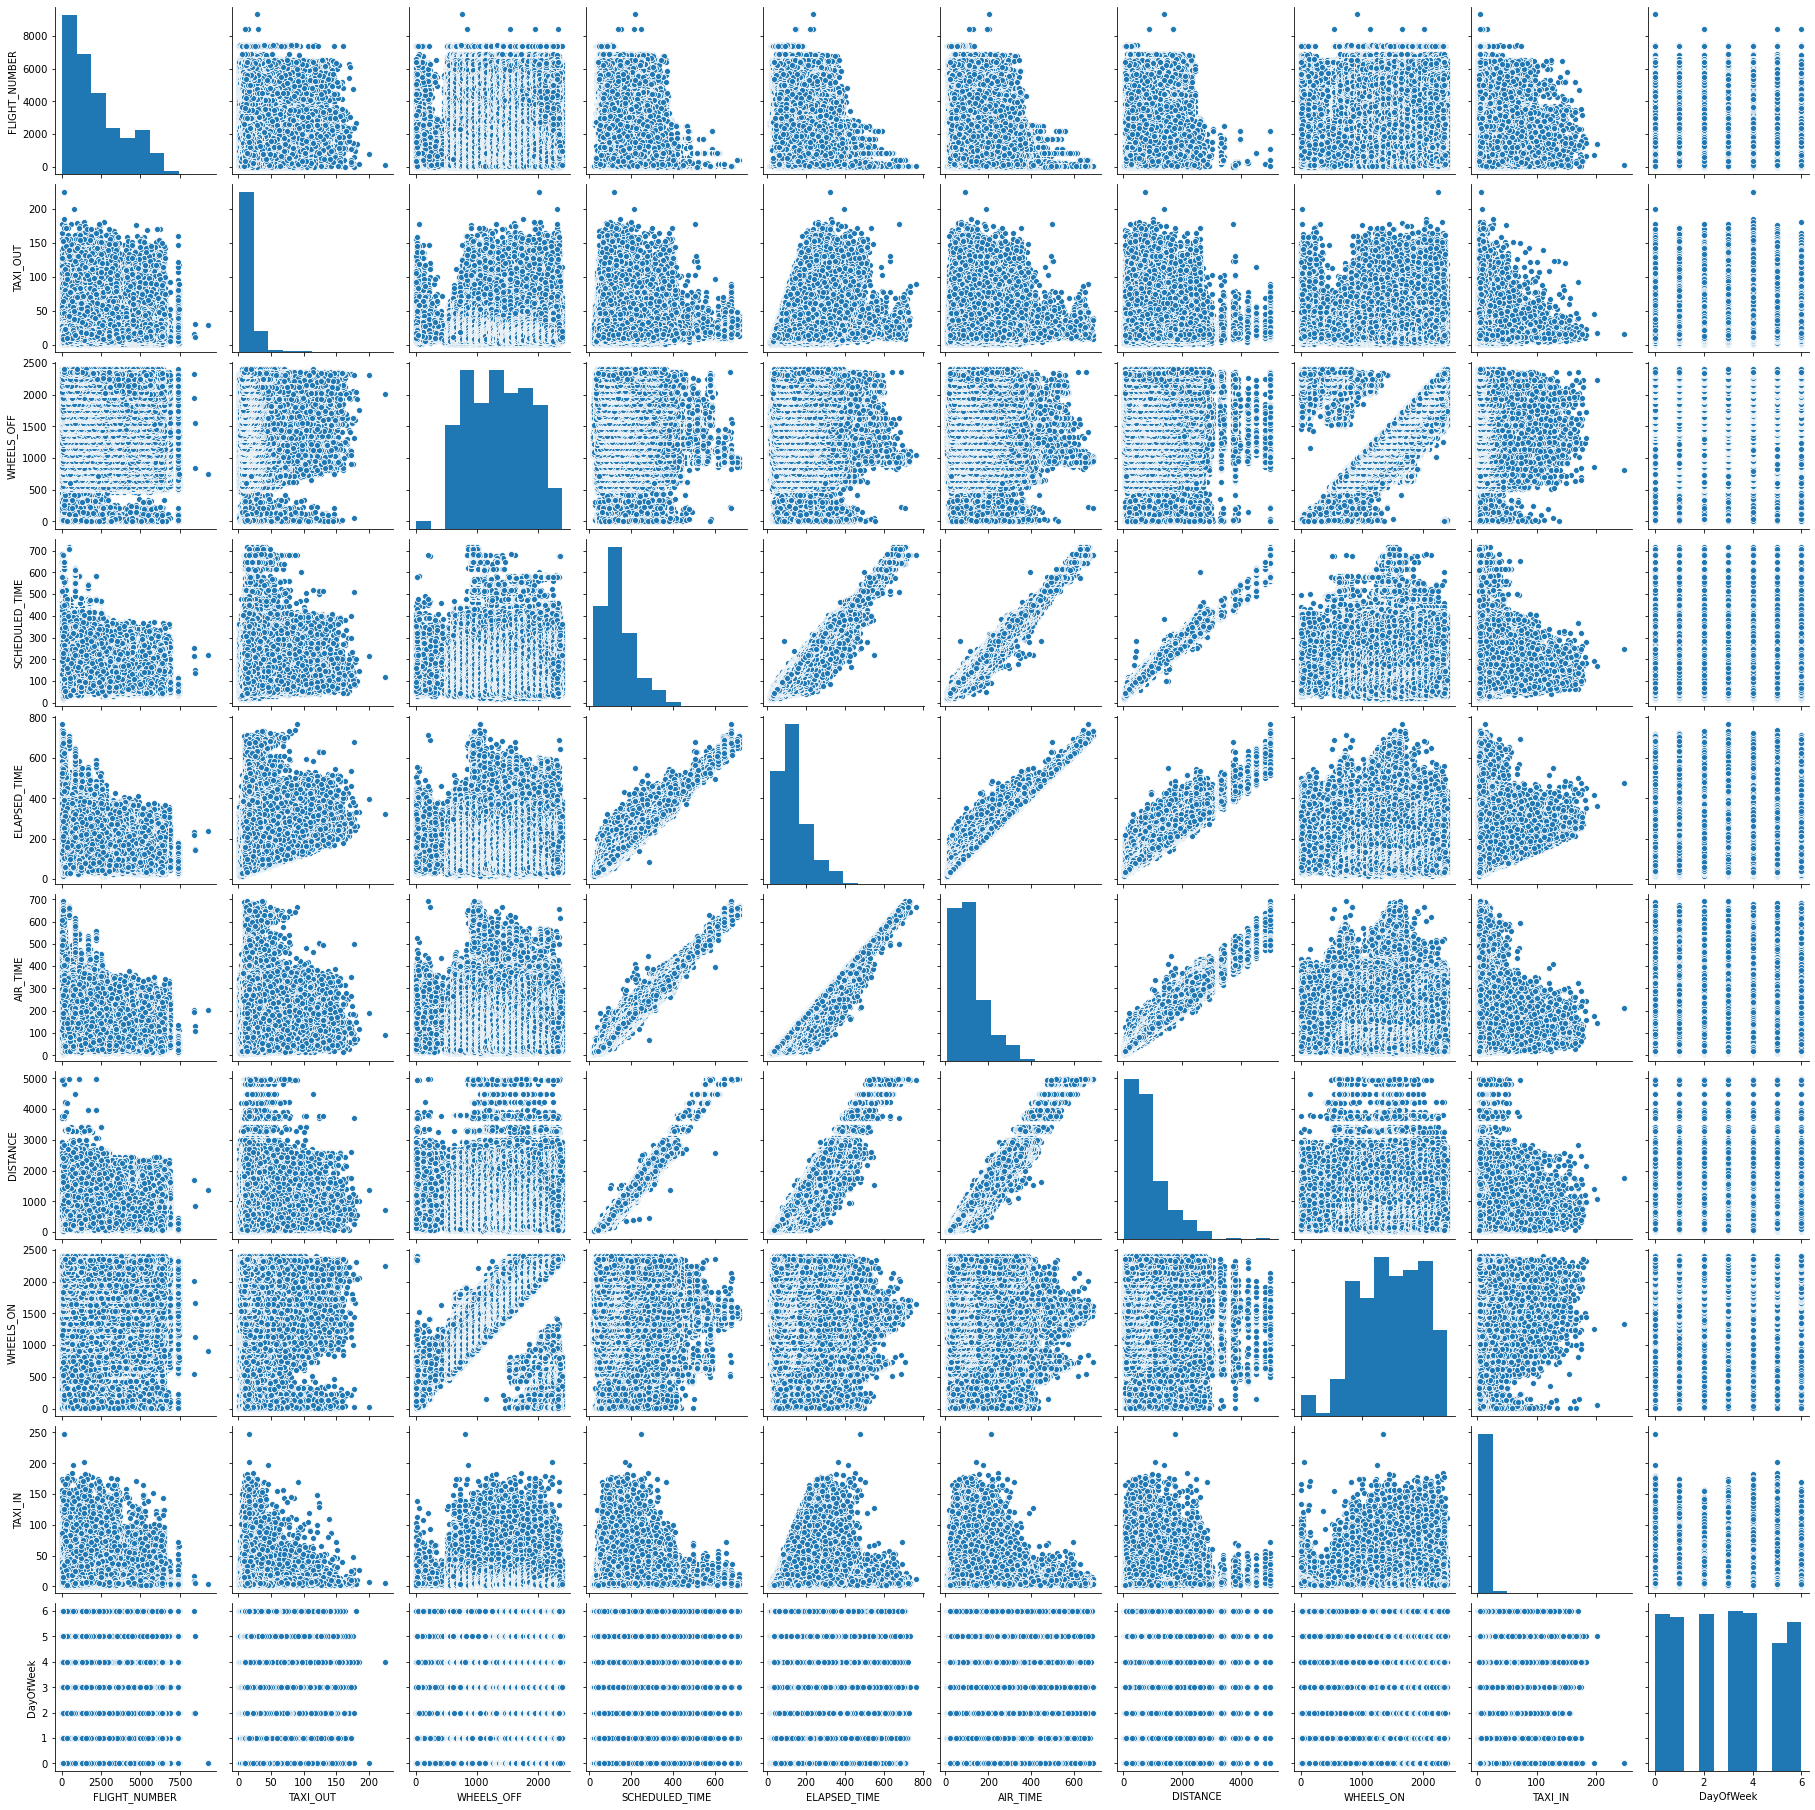

In [57]:
sns.pairplot(Flight_Delays_numeric)
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Flights_Delays_Binary.drop('Delayed', axis=1),
                                                   Flights_Delays_Binary['Delayed'],
                                                   test_size=0.2,
                                                   stratify=Flights_Delays_Binary['Delayed'])

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [42]:
from sklearn.pipeline import FeatureUnion

In [46]:
# numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('scale_data', MinMaxScaler())
])
# categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, cat_columns)
])

In [47]:
param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(max_iter=1000))])

grid_1 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [48]:
grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed: 19.4min remaining:  4.8min
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 24.6min finished


{'classifier__C': 0.1}

In [49]:
grid_1.best_params_

{'classifier__C': 0.1}

In [51]:
from sklearn import  metrics
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_1.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.8923718533166652


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1, max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipeline, param_grid, cv=kfold, return_train_score=True, verbose=5, n_jobs=3)



In [55]:
grid_2.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 23.2min
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed: 102.0min finished
C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale_data',
                                                                                          MinMaxScaler())]),
                                                                         ['FLIGHT_NUMBER',
                                                                          'TAXI_OUT',
                                                                          'WHEELS_OFF',
                                                                          'SCHEDULED_TIME',
                                                                          'ELAPSED_TIME',
                                                                          'AIR_TIME',
                                       

In [58]:
print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , grid_2.predict_proba(X_test)[:,1]) ))

roc_auc_score: 0.9947715210864602
